<a href="https://colab.research.google.com/github/vedanshia22/Data-science-Experience-Program-Finlatics/blob/main/Case_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data file

In [47]:
df = pd.read_excel('/content/banking_data.xlsx')
df.head()

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,married,tertiary,no,2143,yes,no,unknown,5,may,2024-05-05,261,1,-1,0,unknown,no
1,44,technician,single,single,secondary,no,29,yes,no,unknown,5,may,2024-05-05,151,1,-1,0,unknown,no
2,33,entrepreneur,married,married,secondary,no,2,yes,yes,unknown,5,may,2024-05-05,76,1,-1,0,unknown,no
3,47,blue-collar,married,married,unknown,no,1506,yes,no,unknown,5,may,2024-05-05,92,1,-1,0,unknown,no
4,33,unknown,single,single,unknown,no,1,no,no,unknown,5,may,2024-05-05,198,1,-1,0,unknown,no


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45216 entries, 0 to 45215
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   age             45216 non-null  int64         
 1   job             45216 non-null  object        
 2   marital         45213 non-null  object        
 3   marital_status  45213 non-null  object        
 4   education       45213 non-null  object        
 5   default         45216 non-null  object        
 6   balance         45216 non-null  int64         
 7   housing         45216 non-null  object        
 8   loan            45216 non-null  object        
 9   contact         45216 non-null  object        
 10  day             45216 non-null  int64         
 11  month           45216 non-null  object        
 12  day_month       45216 non-null  datetime64[ns]
 13  duration        45216 non-null  int64         
 14  campaign        45216 non-null  int64         
 15  pd

# Checking for missing values

In [49]:
df.isnull().sum()

age               0
job               0
marital           3
marital_status    3
education         3
default           0
balance           0
housing           0
loan              0
contact           0
day               0
month             0
day_month         0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
y                 0
dtype: int64

# Clean the data

In [50]:
# Remove duplicate columns
df.drop(['marital','day_month'], axis=1, inplace=True)
# Drop rows with any null values
df = df.dropna()
df.isnull().sum()

age               0
job               0
marital_status    0
education         0
default           0
balance           0
housing           0
loan              0
contact           0
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
y                 0
dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45210 entries, 0 to 45215
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45210 non-null  int64 
 1   job             45210 non-null  object
 2   marital_status  45210 non-null  object
 3   education       45210 non-null  object
 4   default         45210 non-null  object
 5   balance         45210 non-null  int64 
 6   housing         45210 non-null  object
 7   loan            45210 non-null  object
 8   contact         45210 non-null  object
 9   day             45210 non-null  int64 
 10  month           45210 non-null  object
 11  duration        45210 non-null  int64 
 12  campaign        45210 non-null  int64 
 13  pdays           45210 non-null  int64 
 14  previous        45210 non-null  int64 
 15  poutcome        45210 non-null  object
 16  y               45210 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


# Answers the following questions

# 1. What is the distribution of age among the clients?

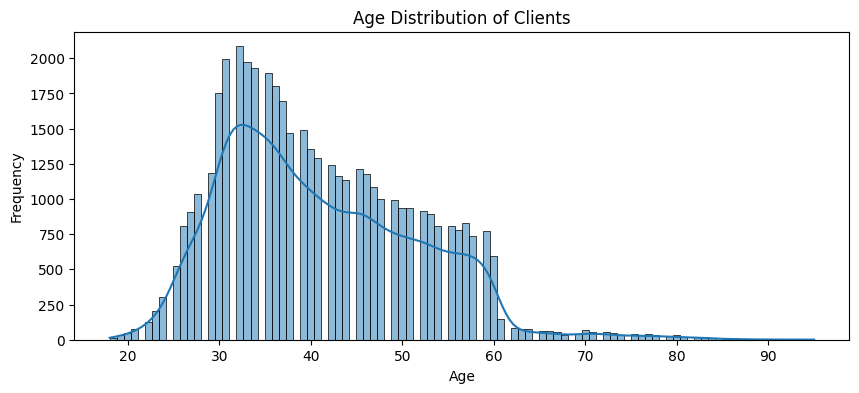

In [52]:
plt.figure(figsize=(10, 4))
sns.histplot(df['age'], bins=100, kde=True)
plt.title('Age Distribution of Clients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2. How does the job type vary among the clients?

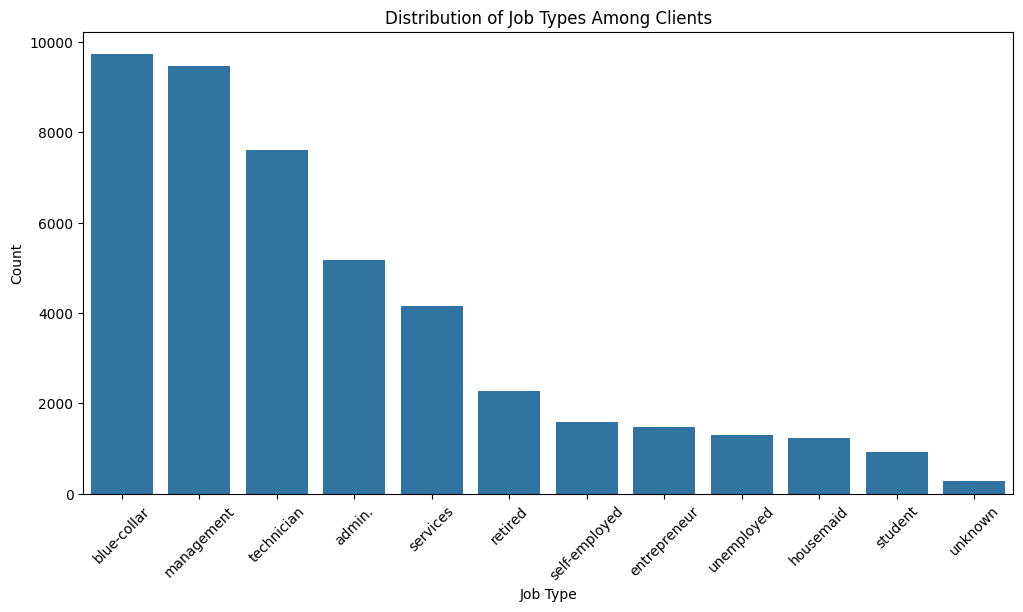

In [53]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='job', order=df['job'].value_counts().index)
plt.title('Distribution of Job Types Among Clients')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 3. What is the marital status distribution of the clients?

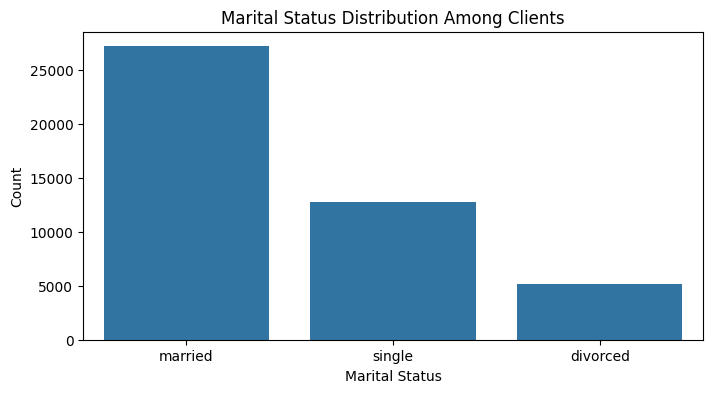

In [54]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='marital_status', order=df['marital_status'].value_counts().index)
plt.title('Marital Status Distribution Among Clients')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

# 4. What is the level of education among the clients?

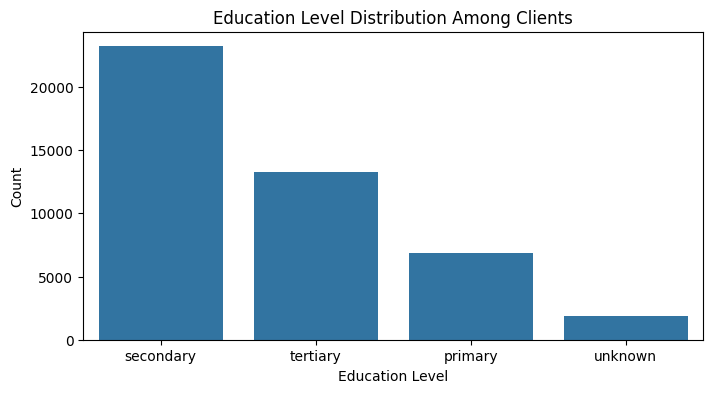

In [55]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='education', order=df['education'].value_counts().index)
plt.title('Education Level Distribution Among Clients')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

#5. What proportion of clients have credit in default?

Proportion of clients with credit in default:
default
no     98.197301
yes     1.802699
Name: proportion, dtype: float64


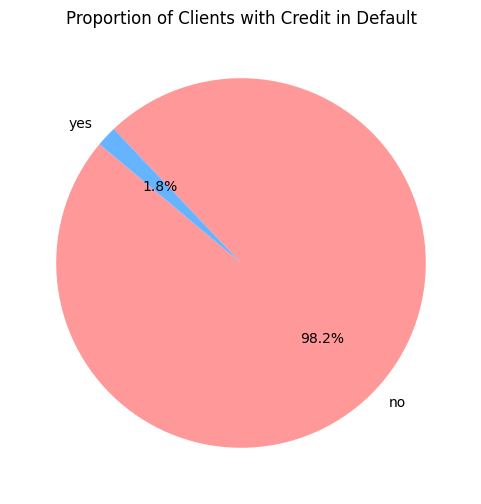

In [56]:
default_counts = df['default'].value_counts(normalize=True)*100
print("Proportion of clients with credit in default:")
print(default_counts)
plt.figure(figsize=(6, 6))
plt.pie(default_counts, labels=default_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Proportion of Clients with Credit in Default')
plt.show()

# 6. What is the distribution of average yearly balance among the clients?

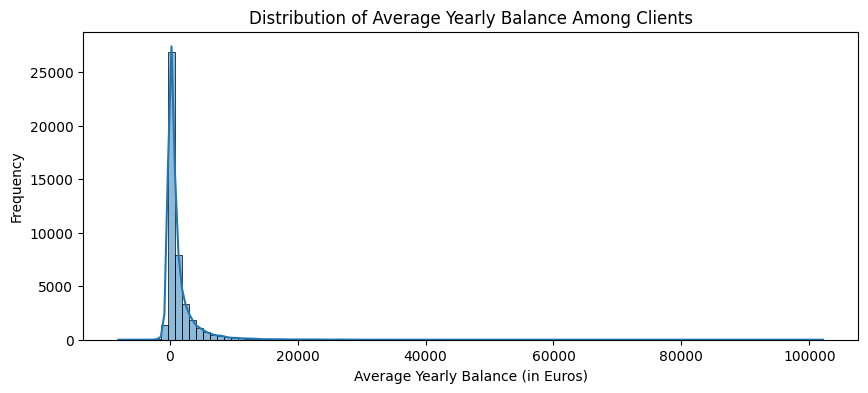

In [57]:
plt.figure(figsize=(10, 4))
sns.histplot(df['balance'], bins=100, kde=True)
plt.title('Distribution of Average Yearly Balance Among Clients')
plt.xlabel('Average Yearly Balance (in Euros)')
plt.ylabel('Frequency')
plt.show()

# 7. How many clients have housing loans?

Number of clients with housing loans:
housing
yes    25130
no     20080
Name: count, dtype: int64

Proportion of clients with housing loans:
housing
yes    55.585048
no     44.414952
Name: proportion, dtype: float64


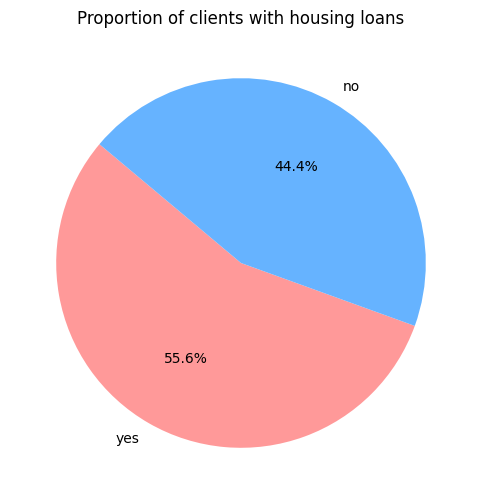

In [58]:
housing_counts = df['housing'].value_counts()
print("Number of clients with housing loans:")
print(housing_counts)
# Alternatively, we can calculate the proportion as well:
housing_proportion = df['housing'].value_counts(normalize=True) * 100
print("\nProportion of clients with housing loans:")
print(housing_proportion)
plt.figure(figsize=(6, 6))
plt.pie(housing_proportion, labels=housing_proportion.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Proportion of clients with housing loans')
plt.show()

# 8. How many clients have personal loans?

Number of clients with personal loans:
loan
no     37966
yes     7244
Name: count, dtype: int64

Proportion of clients with personal loans:
loan
no     83.976996
yes    16.023004
Name: proportion, dtype: float64


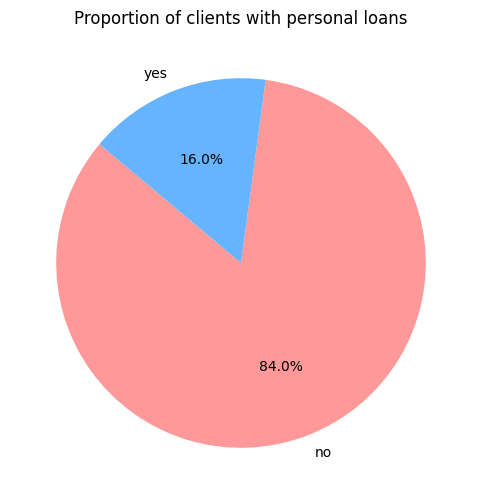

In [59]:
loan_counts = df['loan'].value_counts()
print("Number of clients with personal loans:")
print(loan_counts)
# Alternatively, we can calculate the proportion as well:
loan_proportion = df['loan'].value_counts(normalize=True) * 100
print("\nProportion of clients with personal loans:")
print(loan_proportion)
plt.figure(figsize=(6, 6))
plt.pie(loan_proportion, labels=loan_proportion.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Proportion of clients with personal loans')
plt.show()

# 9. What are the communication types used for contacting clients during the campaign?

Communication types used for contacting clients:
contact
cellular     29288
unknown      13020
telephone     2902
Name: count, dtype: int64


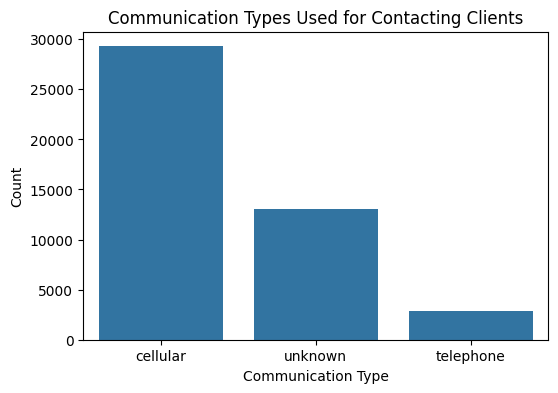

In [60]:
communication_counts = df['contact'].value_counts()
print("Communication types used for contacting clients:")
print(communication_counts)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='contact', order=communication_counts.index)
plt.title('Communication Types Used for Contacting Clients')
plt.xlabel('Communication Type')
plt.ylabel('Count')
plt.show()

# 10. What is the distribution of the last contact day of the month?

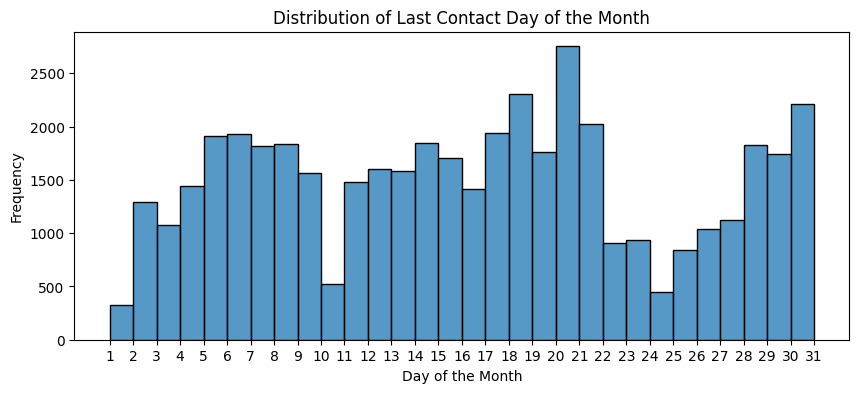

In [61]:
plt.figure(figsize=(10, 4))
sns.histplot(df['day'], bins=30, kde=False)
plt.title('Distribution of Last Contact Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Frequency')
plt.xticks(range(1, 32))
plt.show()

# 11. How does the last contact month vary among the clients?

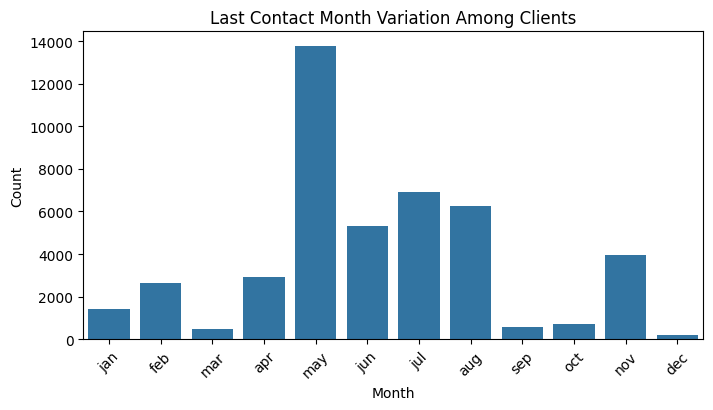

In [62]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='month', order=['jan', 'feb', 'mar', 'apr', 'may', 'jun',
'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])

plt.title('Last Contact Month Variation Among Clients')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 12. What is the distribution of the duration of the last contact?

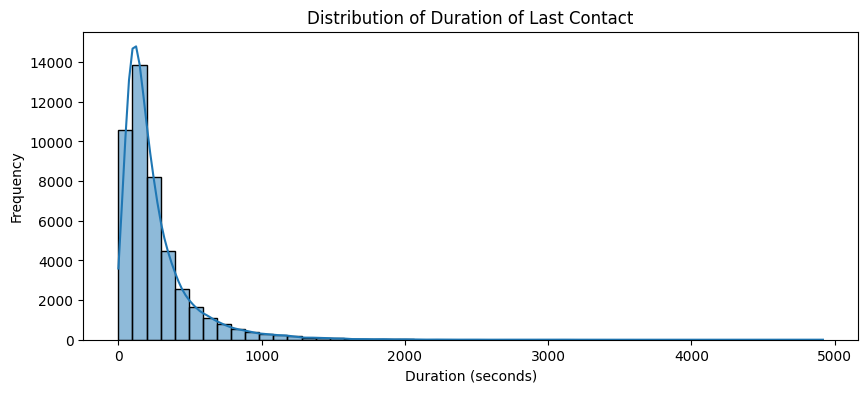

In [63]:
plt.figure(figsize=(10, 4))
sns.histplot(df['duration'], bins=50, kde=True)
plt.title('Distribution of Duration of Last Contact')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

# 13. How many contacts were performed during the campaign for each client?

In [64]:
campaign_counts = df['campaign'].value_counts()
print("Number of contacts performed (campaign) for each client:")
print(campaign_counts)

Number of contacts performed (campaign) for each client:
campaign
1     17545
2     12504
3      5521
4      3521
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: count, dtype: int64


# 14. What is the distribution of the number of days passed since the client was last contacted from the previous campaign?

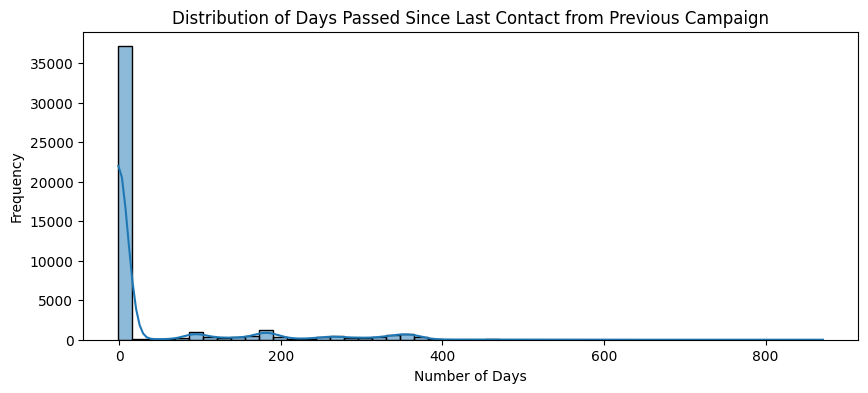

In [65]:
plt.figure(figsize=(10, 4))
sns.histplot(df['pdays'], bins=50, kde=True)
plt.title('Distribution of Days Passed Since Last Contact from Previous Campaign')
plt.xlabel('Number of Days')
plt.ylabel('Frequency')
plt.show()

# 15. How many contacts were performed before the current campaign for each client?

In [66]:
previous_counts = df['previous'].value_counts()
print("Number of contacts performed before the current campaign for each client:")
print(previous_counts)

Number of contacts performed before the current campaign for each client:
previous
0      36954
1       2772
2       2103
3       1142
4        714
5        459
6        278
7        205
8        130
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: count, dtype: int64


# 16. What were the outcomes of the previous marketing campaigns?

Outcomes of previous marketing campaigns:
poutcome
unknown    36959
failure     4900
other       1838
success     1513
Name: count, dtype: int64


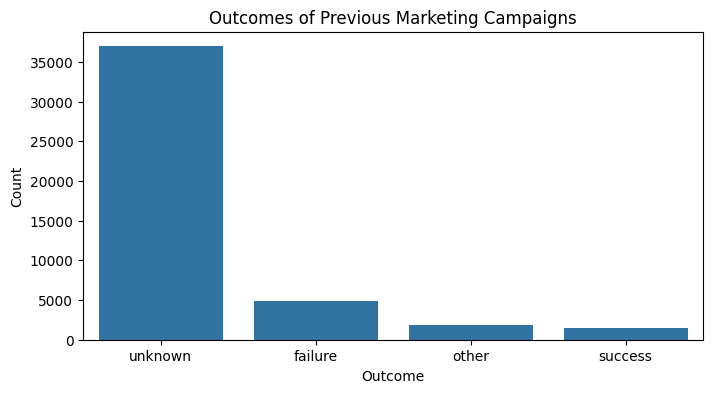

In [67]:
poutcome_counts = df['poutcome'].value_counts()
print("Outcomes of previous marketing campaigns:")
print(poutcome_counts)
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='poutcome', order=poutcome_counts.index)
plt.title('Outcomes of Previous Marketing Campaigns')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

# 17. What is the distribution of clients who subscribed to a term deposit vs. those who did not?

Distribution of clients who subscribed to a term deposit vs. those who did not:
y
no     39917
yes     5293
Name: count, dtype: int64


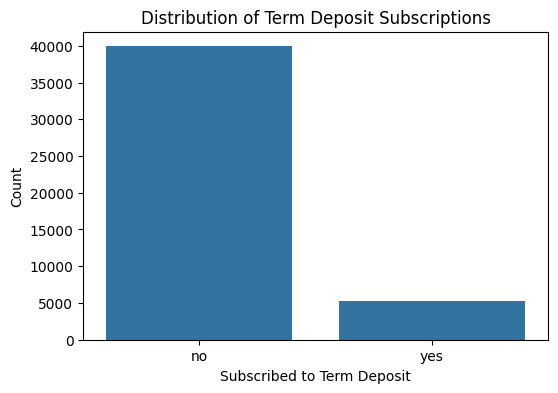

In [68]:
subscription_counts = df['y'].value_counts()
print("Distribution of clients who subscribed to a term deposit vs. those who did not:")
print(subscription_counts)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='y')
plt.title('Distribution of Term Deposit Subscriptions')
plt.xlabel('Subscribed to Term Deposit')
plt.ylabel('Count')
plt.show()

# 18. Are there any correlations between different attributes and the likelihood of subscribing to a term deposit?

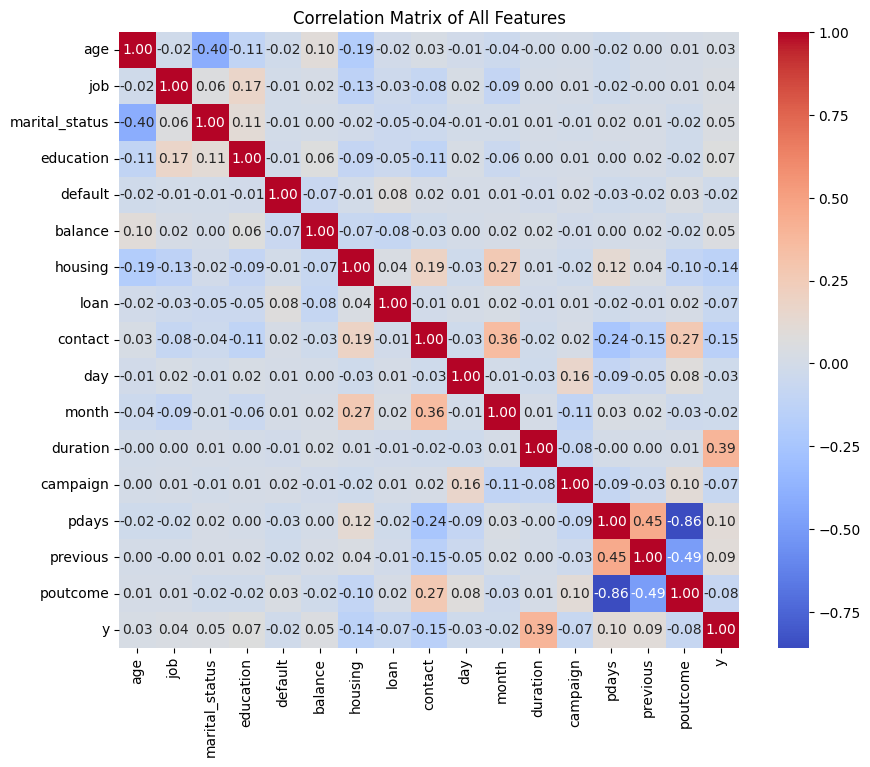

In [69]:
from sklearn.preprocessing import LabelEncoder
categorical_features = ['job', 'marital_status', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
# Encode categorical columns using LabelEncoder
label_encoder = LabelEncoder()
for column in categorical_features:
   df[column] = label_encoder.fit_transform(df[column])
# Encode the target variable 'y'
df['y'] = label_encoder.fit_transform(df['y'])
# Compute the correlation matrix for all columns
correlation_matrix = df.corr()
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of All Features')
plt.show()